# Examples of the usage

Import dataset class

In [1]:
from urbanworm import UrbanDataSet

## 1 single-image inference

### 1.1 one image input

Initialize dataset object

In [3]:
data = UrbanDataSet(image = './data/test1.jpg')

To let the model understand the task, we need to specify what information we want to know from the input image and the format it should follow to structure the response. In some cases, giving more contexts such as the definition of terminology/concept and criteria for decision making may enhance the inference ability of model.

In [4]:
system = '''
    Given a top view image, you are going to roughly estimate house conditions. Your answer should be based only on your observation. 
    The format of your response must include question, answer (yes or no), explaination (within 50 words)
'''
prompt = '''
    Is there any damage on the roof?
'''
res = data.oneImgChat(system=system, prompt=prompt)

Inference starts ...


The default format of schema for the output includes:
- question
- answer
- explanation

When saveImg=True, image will be save in the base64 format.

In [5]:
res.keys()

dict_keys(['question', 'answer', 'explanation', 'img'])

In [6]:
res['question'], res['answer'], res['explanation']

('Is there any damage on the roof?',
 'No',
 'Based on the image, the roof appears to be intact and without any visible signs of damage like missing shingles or significant discoloration. It looks generally well-maintained.')

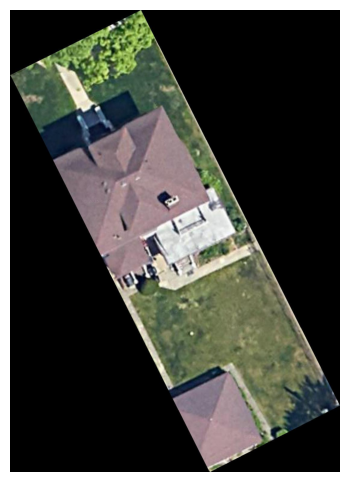

In [7]:
data.plotBase64(res['img'])

### 1.2 customize the format for output

For different research purposes, you can customize the format of responses from the model

In [2]:
from urbanworm.format_creation import create_format

The response format can be customized. In the example below, "explanation" is replaced by "confidence", which measures how the model is confident with its answer.

In [3]:
# specify the new schema in a dictionary
schema = {
    "question": (str, ...),
    "explanation": (str, ...),
    "answer": (str, ...),
    "confidence": (float, ...), 
}
# define a new Response class
CustomResponse = create_format(schema)

In [5]:
data = UrbanDataSet(image = './data/test2.jpg', format=CustomResponse)
system = '''
    Given a top view image, you are going to roughly estimate house conditions. Your answer should be based only on your observation. 
    The format of your response must include question, 50 ward explanation, answer (yes or no), confidence (0-1)
'''
prompt = '''
    Is there any damage on the roof?
'''
res = data.oneImgChat(system=system, prompt=prompt)
res.keys()

Inference starts ...


dict_keys(['question', 'explanation', 'answer', 'confidence', 'img'])

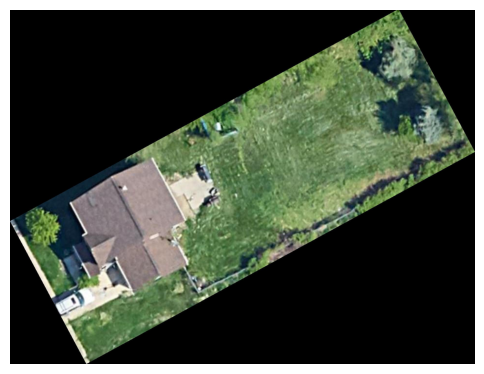

In [11]:
data.plotBase64(res['img'])

In [6]:
res['question'], res['answer'], res['confidence']

('Is there any damage on the roof?', 'no', 0.75)

## 2 batch images inference

### 2.1 batch images input

In [8]:
imgs = ['./data/test1.jpg', './data/test2.jpg', './data/test3.jpg',]
CustomResponse = create_format(schema)
data = UrbanDataSet(images = imgs, format=CustomResponse)
system = '''
    Given a top view image, you are going to roughly estimate house conditions. Your answer should be based only on your observation. 
    The format of your response must include question, answer (yes or no), explanation (within 50 words), confidence (0-1)
'''
prompt = '''
    Question 1: Is there any damage on the roof?
    Question 2: Is there solar panel on the roof?
'''
res = data.loopImgChat(system=system, prompt=prompt, output_df=True)
res

Processing...: 100%|█████████████████████████| 3/3 [01:09<00:00, 23.21s/it]


question1  \
0  Is there any damage on the roof?   
1  Is there any damage on the roof?   
2  Is there any damage on the roof?   

                                        explanation1 answer1  confidence1  \
0  It's difficult to definitively say. There are ...      no          0.6   
1  The roof appears relatively uniform with no ob...      No          0.8   
2  It's difficult to definitively say. The image ...      no          0.6   

                           question2  \
0  Is there solar panel on the roof?   
1  Is there solar panel on the roof?   
2  Is there solar panel on the roof?   

                                        explanation2 answer2  confidence2  \
0  I don't see any distinct rectangular shapes th...      no          0.8   
1  There are no visible signs of solar panels on ...      No          0.9   
2  I don't see any distinct shapes or patterns th...      no          0.8   

                img  
0  ./data/test1.jpg  
1  ./data/test2.jpg  
2  ./data/test3.jpg

### 2.2 Open-source building footprints

In [2]:
bbox = (-83.235572,42.348092,-83.235154,42.348806)
data = UrbanDataSet()
data.bbox2Buildings(bbox, source='osm')

'5 buildings found in the bounding box.'

In [5]:
data.units

geometry
0  POLYGON ((-83.23534 42.3488, -83.23523 42.3488...
1  POLYGON ((-83.23533 42.34865, -83.23522 42.348...
2  POLYGON ((-83.23533 42.3485, -83.23522 42.3485...
3  POLYGON ((-83.23533 42.34835, -83.23521 42.348...
4  POLYGON ((-83.23532 42.34821, -83.23521 42.348...

<Axes: >

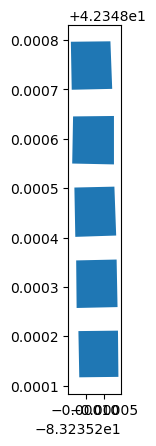

In [16]:
data.units.plot()

The output can be assigned to a new variable. It is also automatically stored in the data structure and can be called.

In [17]:
system = '''
    Given a top view image, you are going to roughly estimate house conditions. Your answer should be based only on your observation. 
    The format of your response must include question, answer (yes or no), explaination (within 50 words)
'''
prompt = {
    'top':'''
        Is there any damage on the roof?
    '''
}

# inspect the aerial images only (with type='top')
res = data.loopUnitChat(system=system, prompt=prompt, type='top', epsg=2253)

Processing...: 100%|█████████████████████████| 5/5 [00:08<00:00,  1.64s/it]


In [18]:
data.to_gdf()

geometry                top_view_question1  \
0  POINT (-83.23528 42.34875)  Is there any damage on the roof?   
1   POINT (-83.23528 42.3486)  Is there any damage on the roof?   
2  POINT (-83.23527 42.34845)  Is there any damage on the roof?   
3  POINT (-83.23527 42.34831)  Is there any damage on the roof?   
4  POINT (-83.23526 42.34816)  Is there any damage on the roof?   

  top_view_answer1                              top_view_explanation1  \
0               No  Based on the top-down view, the roof appears i...   
1               No  Based on the image, the roof appears to be int...   
2               No  Based on the image, the roof appears intact an...   
3               No  The roof appears to be flat and uniform. There...   
4               No  The roof appears intact and smooth from this t...   

                                     top_view_base64  
0  /9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...  
1  /9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...  
2  /9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...  
3  /9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...  
4  /9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...

With `type = 'both'` (The default is `top`.), the method `loopUnitChat` can inspect both aerial and street view images. 
With `multi = True` (The default is `False`), for each unit, three closest street views will be collected for inference. This will take longer time to process the data.

In this case, the instruction and prompt will be little bit different and more detailed for specifying questions for each type of image.

In [6]:
system = '''
    Given a top view image or street view images, you are going to roughly estimate house conditions. 
    Your answer should be based only on your observation. 
    The format of your response must include question, answer (yes or no), explaination (within 50 words) for each question.
'''

prompt = {
    'top': '''
        Is there any damage on the roof?
    ''',
    'street': '''
        Is the house occupied?
        Is any window broken or boarded?
        Is the door missing or boarded?
        Is the wall missing or damaged?
        Is the yard maintained well?
    '''
}

# add the Mapillary key
data.mapillary_key = 'MLY|...'
# inspect both the aerial and street view images (with type='both')
res = data.loopUnitChat(system=system, prompt=prompt, type='both', epsg=2253, multi=True)

Processing...: 100%|████████████████████████| 5/5 [15:23<00:00, 184.63s/it]


In [7]:
data.to_gdf()

geometry                top_view_question1  \
0  POINT (-83.23528 42.34875)  Is there any damage on the roof?   
1   POINT (-83.23528 42.3486)  Is there any damage on the roof?   
2  POINT (-83.23527 42.34845)  Is there any damage on the roof?   
3  POINT (-83.23527 42.34831)  Is there any damage on the roof?   
4  POINT (-83.23526 42.34816)  Is there any damage on the roof?   

  top_view_answer1                              top_view_explanation1  \
0               No  The roof appears intact and doesn's show any v...   
1               No  The roof appears to be intact and without any ...   
2               No  The roof appears intact and flat. There are no...   
3               No  The roof appears to be flat and intact. There ...   
4               No  The roof appears intact and doesn't show any v...   

                               street_view_question1 street_view_answer1  \
0  Is the house occupied? | Is the house occupied...     yes | yes | yes   
1  Is the house occupied? | Is the house occupied...     yes | yes | yes   
2  Is the house occupied? | Is the house occupied...        no | no | no   
3  Is the house occupied? | Is the house occupied...        no | no | no   
4  Is the house occupied? | Is the house occupied...     yes | yes | yes   

                            street_view_explanation1  \
0  Lights are on in the houses, suggesting occupa...   
1  Mailboxes are visible, suggesting regular use....   
2  There are cars parked in the driveway, but the...   
3  There are no signs of recent activity, and the...   
4  Cars are parked in the driveway, suggesting re...   

                               street_view_question2 street_view_answer2  \
0  Is any window broken or boarded? | Is any wind...        no | no | no   
1  Is any window broken or boarded? | Is any wind...        no | no | no   
2  Is any window broken or boarded? | Is any wind...        no | no | no   
3  Is any window broken or boarded? | Is any wind...        no | no | no   
4  Is any window broken or boarded? | Is any wind...        no | no | no   

                            street_view_explanation2  ... street_view_answer3  \
0  All windows appear intact. There are no signs ...  ...        no | no | no   
1  All windows appear intact and clear. There are...  ...        no | no | no   
2  All windows appear intact and there's no visib...  ...        no | no | no   
3  All windows appear intact and are not covered ...  ...        no | no | no   
4  All windows appear intact and clear. There are...  ...        no | no | no   

                            street_view_explanation3  \
0  All doors are present and appear to be in good...   
1  The front door is present and appears to be in...   
2  The front doors are present and appear intact,...   
3  The front door is present and appears undamage...   
4  The front door is present and appears to be in...   

                               street_view_question4 street_view_answer4  \
0  Is the wall missing or damaged? | Is the wall ...        no | no | no   
1  Is the wall missing or damaged? | Is the wall ...        no | no | no   
2  Is the wall missing or damaged? | Is the wall ...        no | no | no   
3  Is the wall missing or damaged? | Is the wall ...        no | no | no   
4  Is the wall missing or damaged? | Is the wall ...        no | no | no   

                            street_view_explanation4  \
0  The visible walls of the houses appear to be i...   
1  The visible walls of the house appear to be in...   
2  The visible walls of the houses appear to be i...   
3  The visible walls of the house appear intact a...   
4  The exterior walls appear intact and in good c...   

                               street_view_question5 street_view_answer5  \
0  Is the yard maintained well? | Is the yard mai...        no | no | no   
1  Is the yard maintained well? | Is the yard mai...     yes | yes | yes   
2  Is the yard maintained well? | Is the yard mai...        no | no | no   
3  Is 

To accelerate the inference process for s set of images, we impletemented the strategy of putting multiple street view images as multiple messages in a single message entity given the fact that most models don't take mulitple imagery inputs.

In [3]:
system = '''
    Given three street view images, you are going to roughly estimate house conditions based on all images. 
    Your answer should be based only on your observation. 
    The format of your response must include question, answer (yes or no), explaination (within 50 words) for each question.
'''

prompt = {
    'street': '''
        Is the house occupied?
        Is any window broken or boarded?
        Is the door missing or boarded?
        Is the wall missing or damaged?
        Is the yard maintained well?
    '''
}
res = data.loopUnitChat(system=system, prompt=prompt, type='street', epsg=2253, multi=True, multiImgInput=True)

Processing...: 100%|█████████████████████████| 5/5 [05:05<00:00, 61.05s/it]


In [5]:
data.to_gdf()

geometry   street_view_question1 street_view_answer1  \
0  POINT (-83.23528 42.34875)  Is the house occupied?                 yes   
1   POINT (-83.23528 42.3486)  Is the house occupied?                  no   
2  POINT (-83.23527 42.34845)  Is the house occupied?                  no   
3  POINT (-83.23527 42.34831)  Is the house occupied?                  no   
4  POINT (-83.23526 42.34816)  Is the house occupied?                 yes   

                            street_view_explanation1  \
0  Lights are on in the houses in the second and ...   
1  The yard looks unkempt, and there are no visib...   
2  The yard is overgrown, cars are parked in fron...   
3  There are no signs of recent activity, and the...   
4  Cars are parked in the driveway, suggesting re...   

              street_view_question2 street_view_answer2  \
0  Is any window broken or boarded?                  no   
1  Is any window broken or boarded?                  no   
2  Is any window broken or boarded?                  no   
3  Is any window broken or boarded?                  no   
4  Is any window broken or boarded?                  no   

                            street_view_explanation2  \
0  All windows appear intact in all three images....   
1  All windows appear intact in all three images....   
2  All windows appear intact in the visible porti...   
3  All windows appear intact and clear, with no v...   
4  All windows appear intact and clear. There are...   

             street_view_question3 street_view_answer3  \
0  Is the door missing or boarded?                  no   
1  Is the door missing or boarded?                  no   
2  Is the door missing or boarded?                  no   
3  Is the door missing or boarded?                  no   
4  Is the door missing or boarded?                  no   

                            street_view_explanation3  \
0  All doors are present and appear to be in good...   
1  The front door is present and appears intact i...   
2  The doors are present and appear intact in all...   
3  The front door is present and appears undamage...   
4  The front doors are present and appear undamag...   

             street_view_question4 street_view_answer4  \
0  Is the wall missing or damaged?                  no   
1  Is the wall missing or damaged?                  no   
2  Is the wall missing or damaged?                  no   
3  Is the wall missing or damaged?                  no   
4  Is the wall missing or damaged?                  no   

                            street_view_explanation4  \
0  The walls of the houses appear intact in all t...   
1  The visible walls of the house appear to be in...   
2  The visible walls appear to be intact. There a...   
3  The exterior walls of the house appear intact ...   
4  The exterior walls of the houses appear intact...   

          street_view_question5 street_view_answer5  \
0  Is the yard maintained well?                  no   
1  Is the yard maintained well?                  no   
2  Is the yard maintained well?                  no   
3  Is the yard maintained well?                  no   
4  Is the yard maintained well?                  no   

                            street_view_explanation5  \
0  The yards appear somewhat overgrown with weeds...   
1  The yard appears overgrown with weeds and leav...   
2  The yard is overgrown with weeds and grass. Th...   
3  The yard shows signs of neglect, with overgrow...   
4  The grass appears somewhat overgrown and there...   

                                  street_view_base64  
0  [iVBORw0KGgoAAAANSUhEUgAAAZAAAAEsCAIAAABi1XKVA...  
1  [iVBORw0KGgoAAAANSUhEUgAAAZAAAAEsCAIAAABi1XKVA...  
2  [iVBORw0KGgoAAAANSUhEUgAAAZAAAAEsCAIAAABi1XKVA...  
3  [iVBORw0KGgoAAAANSUhEUgAAAZAAAAEsCAIAAABi1XKVA...  
4  [iVBORw0KGgoAAAANSUhEUgAAAZAAAAEsCAIAAABi1XKVA...

# 3 Chat for data analysis/interpretation

In [21]:
data.dataAnalyst(prompt='please summarize the results')

Okay, let's analyze the provided data and synthesize a comprehensive understanding of the responses.

**Overall Observations:**

*   **Dominant Response:** The overwhelmingly dominant response across all questions is “no”. This is particularly true for questions related to damage (roof, windows, doors, walls) and occupancy.
*   **Consistent Question Structure:** The questions are consistently framed with a repeated phrasing ("Is there any...?", "Is the house occupied?"). This suggests a standardized data collection process.
*   **Multiple Question Sets:** The data includes multiple sets of questions, likely representing different observations or assessments of the same property.

**Detailed Analysis of Response Types & Distributions:**

*   **`top_view_answer1` (Roof Damage):**  String. Value distribution: “no” (3), “yes” (1). This indicates that in the majority of observations, the roof was assessed as undamaged.
*   **`street_view_answer1` (Occupancy):** String. Value distribution: “

In [22]:
data.messageHistory

[{'role': 'system', 'content': 'You are a spatial data analyst.'},
 {'role': 'user',
  'content': 'Please analyze and summarize the main patterns found in the answer columns of this dataset.\n            Consider the value types (e.g., numeric or categorical), and also consider the relationship between question and answer fields when interpreting the values.\n\n            Dataset summary:\n            - Number of spatial units: 3\n- Bounding box: lon [-83.2353, -83.2353], lat [42.3483, 42.3487]\n- Number of data fields (excluding geometry and large fields): 18\n- Field names: top_view_question1, top_view_answer1, top_view_explanation1, street_view_question1, street_view_answer1, street_view_explanation1, street_view_question2, street_view_answer2, street_view_explanation2, street_view_question3, street_view_answer3, street_view_explanation3, street_view_question4, street_view_answer4, street_view_explanation4, street_view_question5, street_view_answer5, street_view_explanation5\n  Sam

3.1 Summarize key characteristics of the GeoDataFrame

In [23]:
summary, example_rows = data._UrbanDataSet__summarize_geo_df()
print(summary)

- Number of spatial units: 3
- Bounding box: lon [-83.2353, -83.2353], lat [42.3483, 42.3487]
- Number of data fields (excluding geometry and large fields): 18
- Field names: top_view_question1, top_view_answer1, top_view_explanation1, street_view_question1, street_view_answer1, street_view_explanation1, street_view_question2, street_view_answer2, street_view_explanation2, street_view_question3, street_view_answer3, street_view_explanation3, street_view_question4, street_view_answer4, street_view_explanation4, street_view_question5, street_view_answer5, street_view_explanation5
  Sample 1: {'top_view_question1': 'Is there any damage on the roof?', 'top_view_answer1': 'No', 'top_view_explanation1': 'The roof appears intact and smooth from this aerial view. There are no visible signs of missing shingles, holes, or other structural damage.', 'street_view_question1': 'Is the house occupied? | Is the house occupied? | Is the house occupied?', 'street_view_answer1': 'no | no | no', 'street_v

3.2 Plot the final GeoDataFrame results (with answer color-coded)

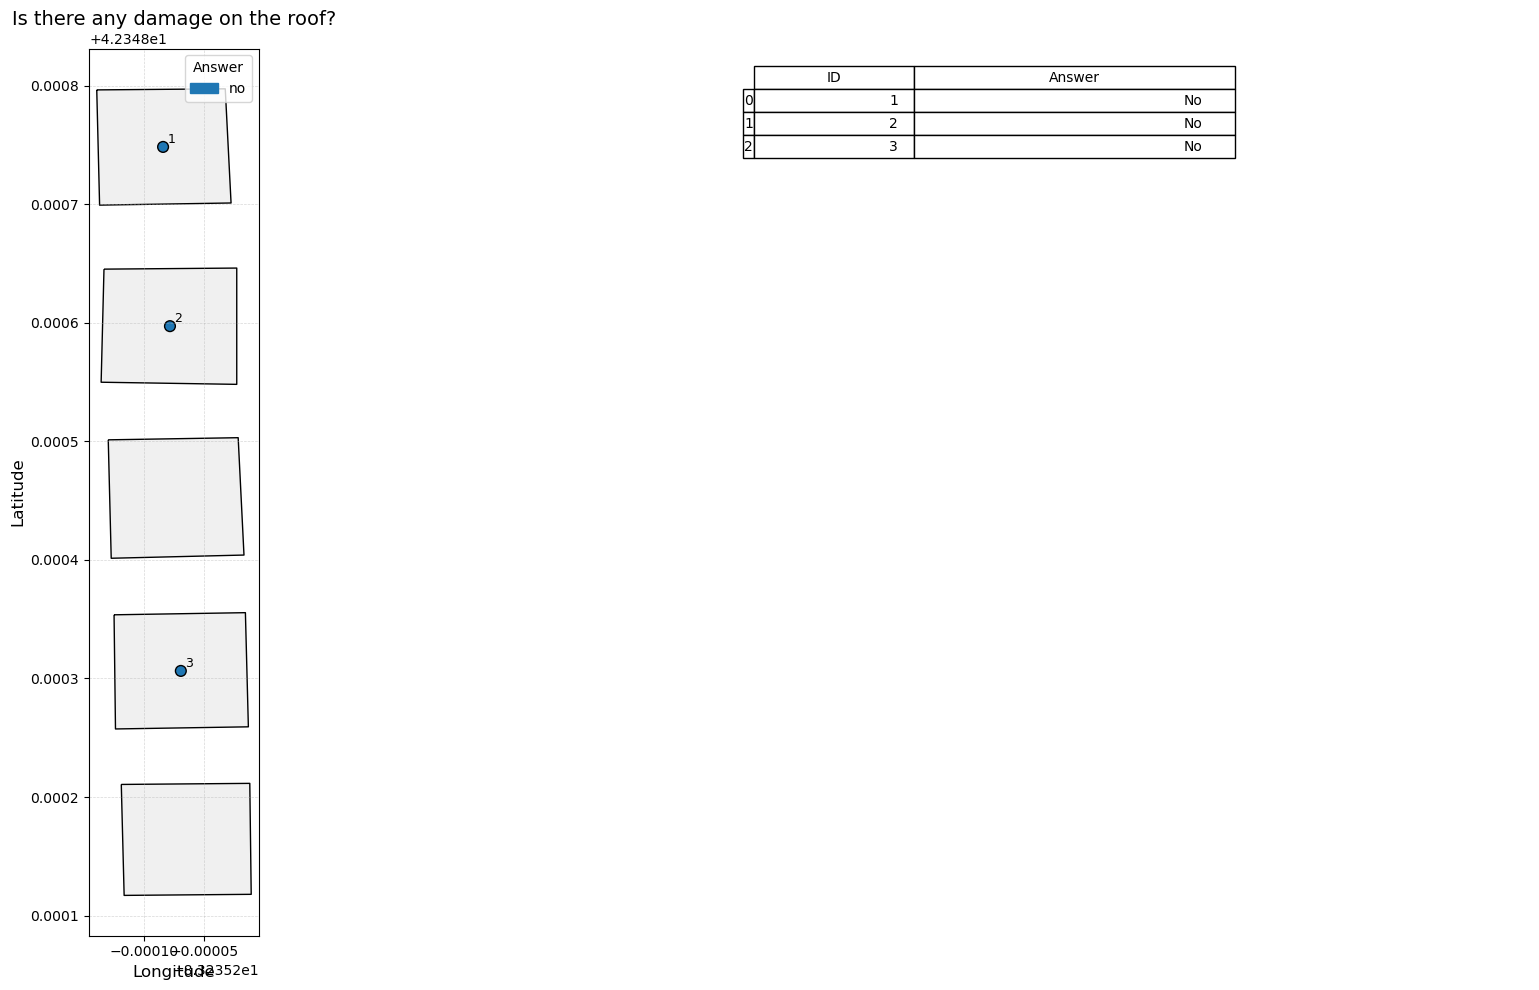

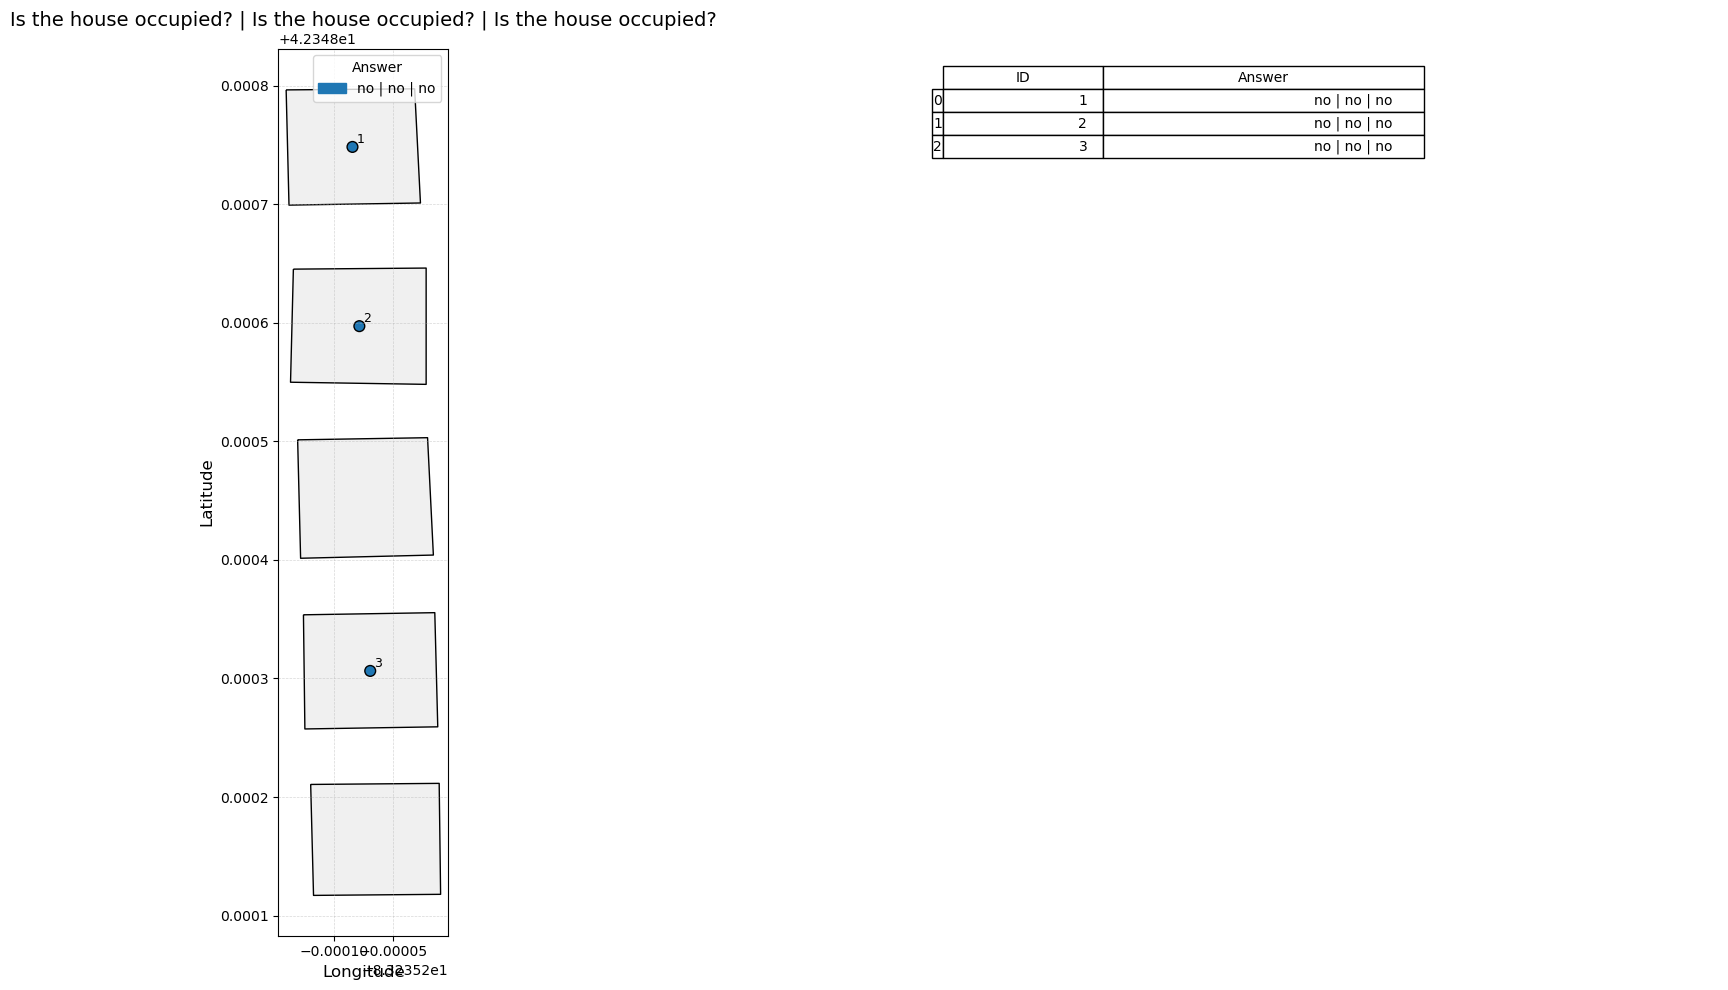

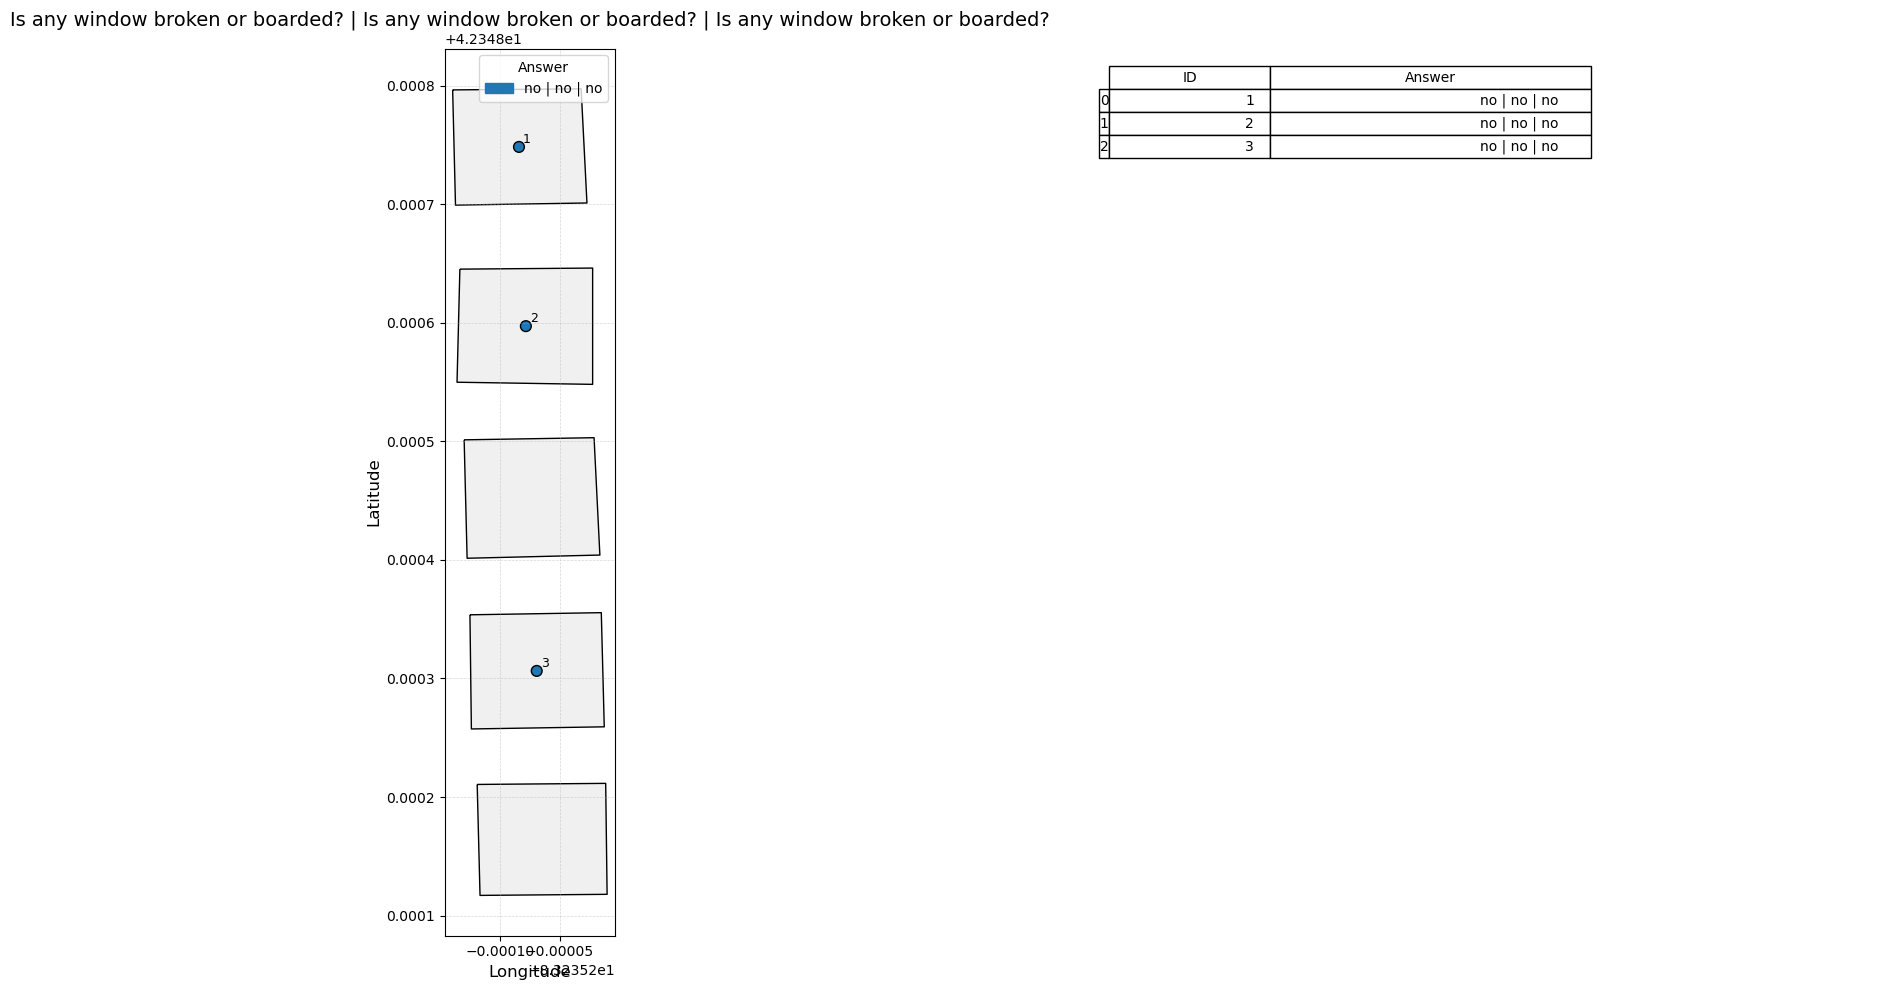

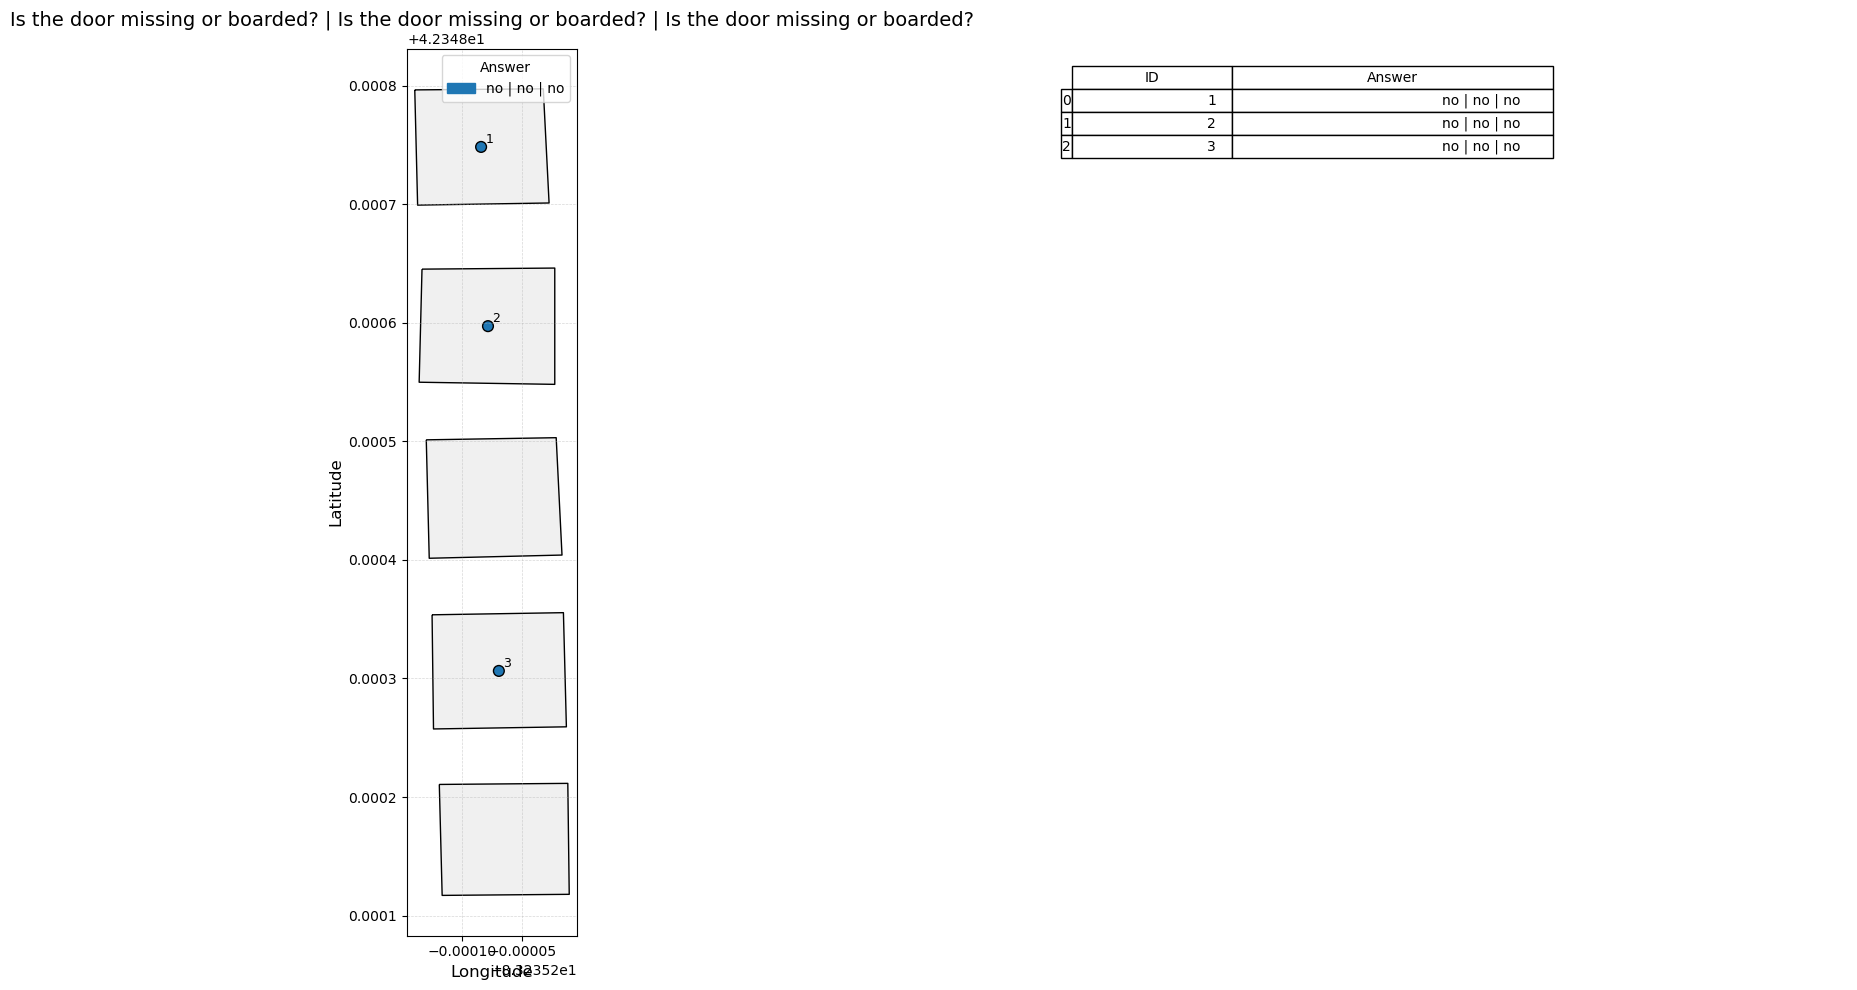

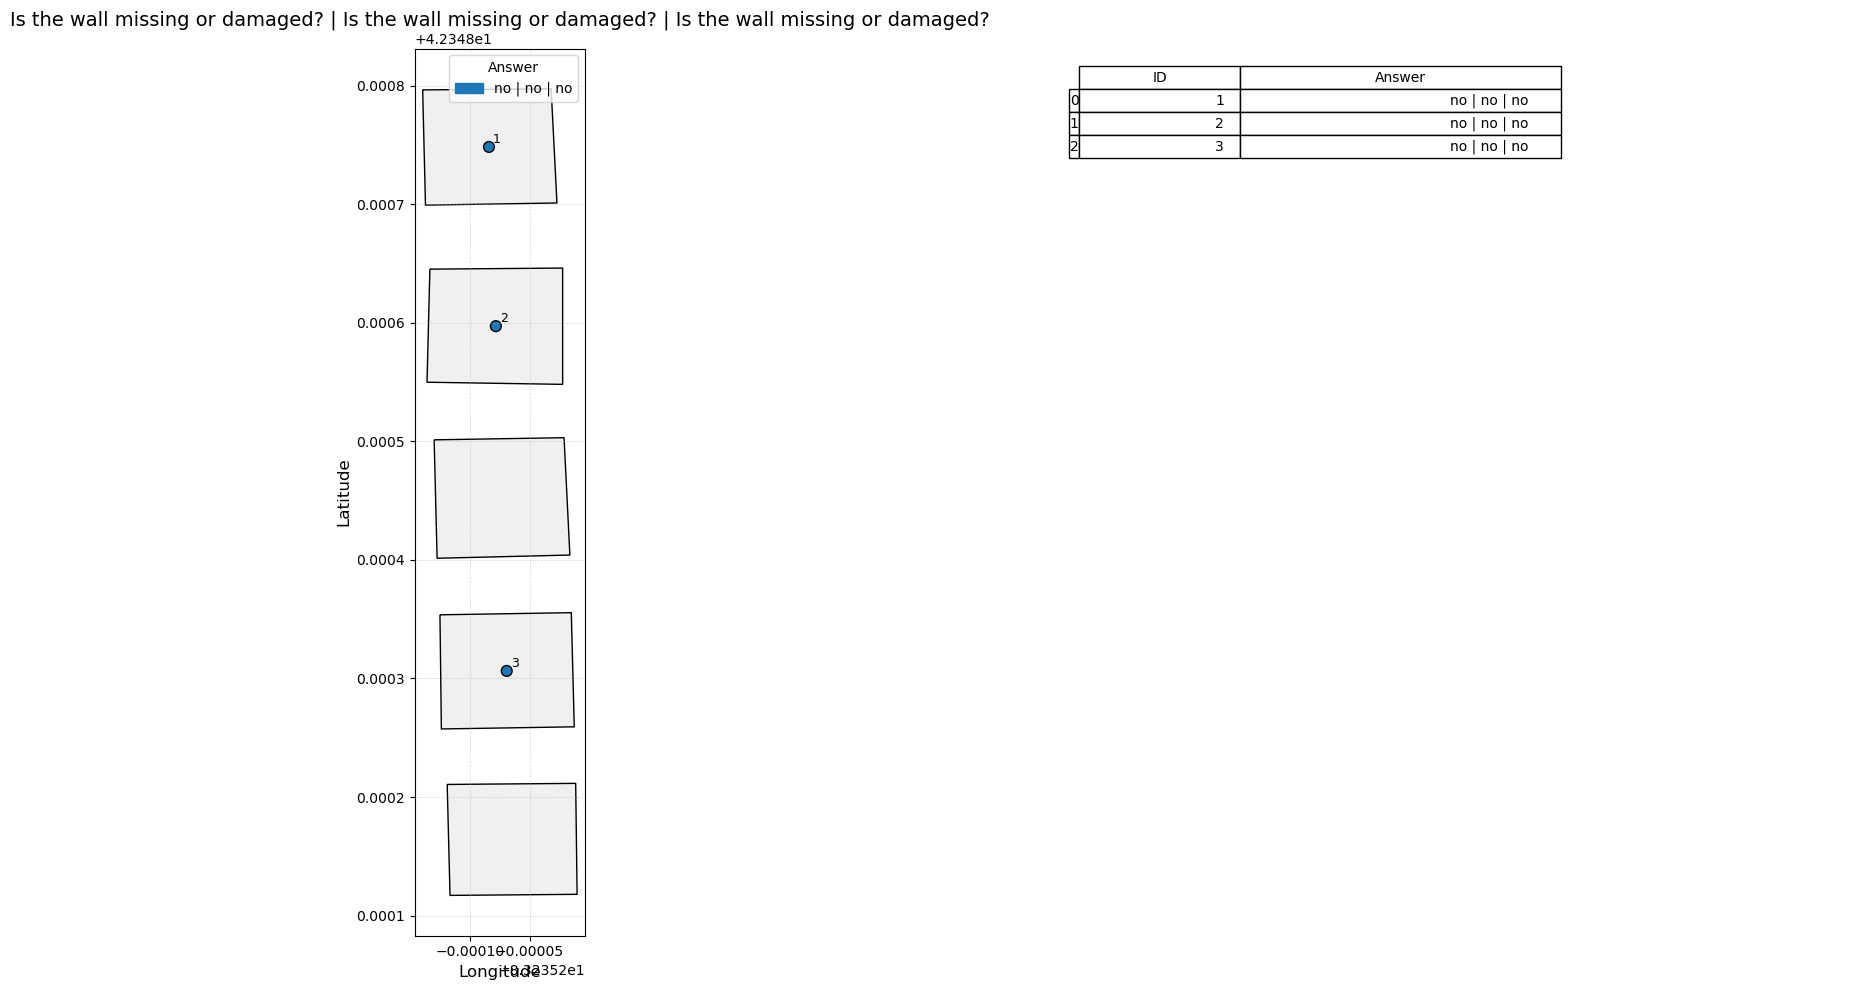

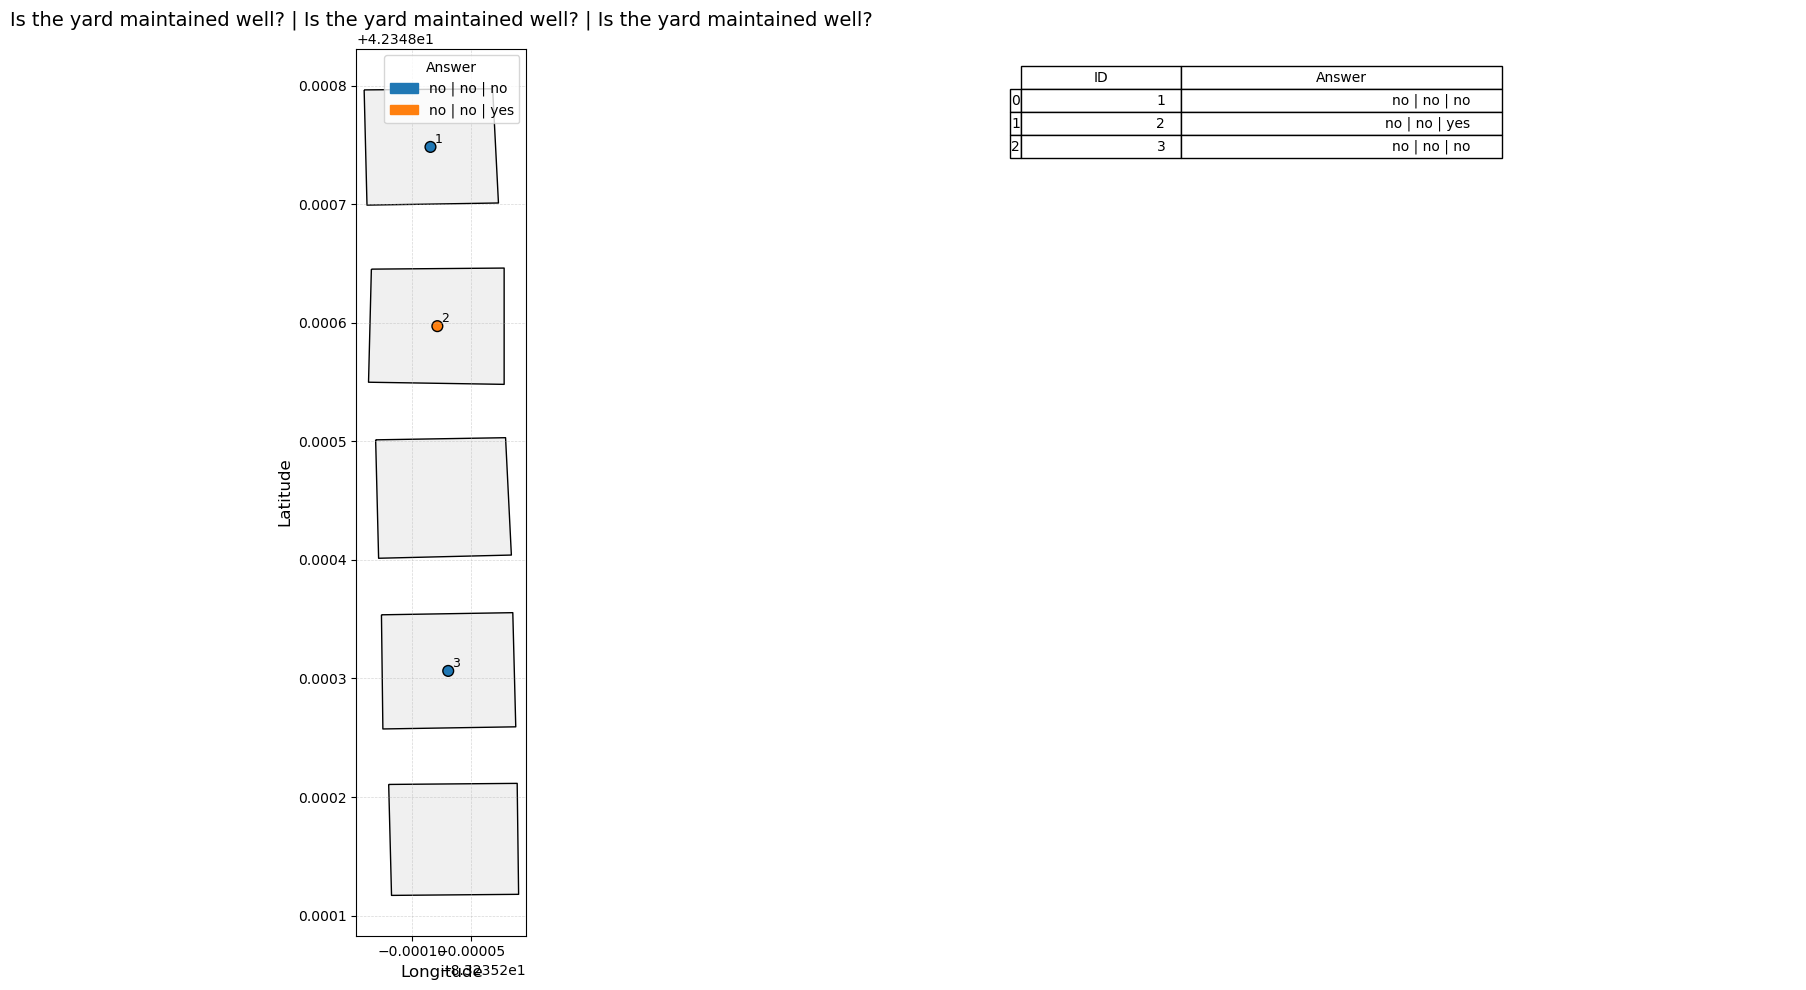

In [25]:
data.plot_gdf()